In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import gc

%matplotlib inline

In [284]:
# 유튜브 채널 '총몇명'
data = pd.read_csv('KR_youtube_trending_data 총몇명.csv', encoding='utf-8')

Text(0, 0.5, 'views')

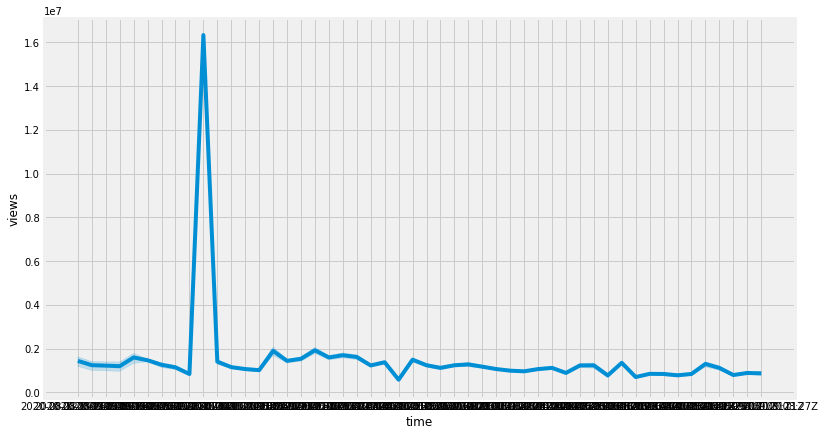

In [285]:
# publish 시간에 따른 조회수

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.lineplot(y=data['view_count'], x=data['publishedAt'])
plt.xlabel('time')
plt.ylabel('views')

In [286]:
# 최초 날짜
data.publishedAt.min()

'2020-08-12T09:00:08Z'

In [287]:
# 마지막 날짜
data.publishedAt.max()

'2021-09-08T09:08:27Z'

In [288]:
def summary_numeric(col):
    print(col)
    print("평균 {:>15}".format(format(data[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(data[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(data[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(data[col].max(), ",.2f")))
summary_numeric("view_count")

view_count
평균    1,231,392.38
최소      482,020.00
중앙    1,192,849.00
최대   16,338,973.00


In [289]:
# 게시된 시간에서 필요한 부분만 자르기
data.publishedAt = data.publishedAt.str[11:13]
data.publishedAt

0      09
1      09
2      09
3      09
4      09
       ..
389    09
390    09
391    09
392    09
393    09
Name: publishedAt, Length: 394, dtype: object

In [290]:
# trending_date를 숫자 데이터로
data.trending_date=pd.to_datetime(data.trending_date, format='%Y-%m-%d')
# 데이터를 trending_date로 분류
data.sort_values(by='trending_date', axis=0, inplace=True)

In [291]:

data_train=data[data.trending_date<'2021-07-05'].copy()
data_test=data[data.trending_date>='2021-07-05'].copy()

del data
gc.collect()

256

In [292]:
# y값 = 조회수
y_train=data_train.view_count.values
y_test=data_test.view_count.values

del data_train['view_count'], data_test['view_count']
gc.collect()

# x값 = 조회수를 제외한 데이터
X_train=data_train.copy()
X_test=data_test.copy()

del data_train,data_test
gc.collect()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((357, 15), (37, 15), (357,), (37,))

In [293]:
train=X_train.copy()
test=X_test.copy()

In [294]:
X_train=train[['likes','comment_count', 'dislikes', 'categoryId']]
X_test = test[['likes','comment_count', 'dislikes', 'categoryId']]

In [295]:
train_rows=X_train.shape[0]
df=pd.concat([X_train,X_test])

df=pd.get_dummies(df)

X_train=df[:train_rows].copy()
X_test=df[train_rows:].copy()

del df
gc.collect()

48

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#1. LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
#2. Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
#3. ElasticNet
el = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
el.fit(X_train, y_train)



ElasticNet(alpha=0.1)

In [297]:
# Linear_Regression을 활용한 예상 조회수 = 1077497
from sklearn import metrics

y_pred=lr.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

98985.54672247313

In [298]:
# Lasso_Regression을 활용한 예상 조회수 = 1077497
from sklearn import metrics

y_pred=lasso.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

98985.54088194949

In [299]:
# ElasticeNet_Regression을 활용한 예상 조회수 = 1077497
from sklearn import metrics

y_pred=el.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

98885.76526484807